EGARCH(Exponential Generalized Autoregressive Conditional Heteroskedasticity) Î™®ÌòïÏùÄ Nelson(1991)Ïù¥ Ï†úÏïàÌïú Î™®Ìòï

Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞Ïùò ÎπÑÎåÄÏπ≠ÏÑ±(asymmetry)Í≥º Î°úÍ∑∏ Ï≤ôÎèÑÎ•º ÌôúÏö©ÌïòÏó¨ GARCH Î™®ÌòïÏùò ÌïúÍ≥ÑÎ•º Î≥¥ÏôÑÌïú ÌôïÏû•Îêú ÌòïÌÉú

In [1]:
pip install arch


   ---------------------------------------- 0.0/928.2 kB ? eta -:--:--
   --------------------------------- ------ 786.4/928.2 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 928.2/928.2 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## ÏÇºÏÑ±Ï†ÑÏûê GARCH(1,1) ÏòàÏ∏° Î≥ÄÎèôÏÑ± (Ìñ•ÌõÑ 5Ïùº)

In [ ]:
# 3. GARCH(1,1) Î™®Îç∏ Ï†ÅÌï©
# p=1	GARCH Î™®Îç∏ÏóêÏÑú Í≥ºÍ±∞ Î∂ÑÏÇ∞(conditional variance)Ïùò ÎûòÍ∑∏ Ïàò
# q=1	GARCH Î™®Îç∏ÏóêÏÑú Í≥ºÍ±∞ Ïò§Ï∞®(ÏûîÏ∞® Ï†úÍ≥±)Ïùò ÎûòÍ∑∏ Ïàò

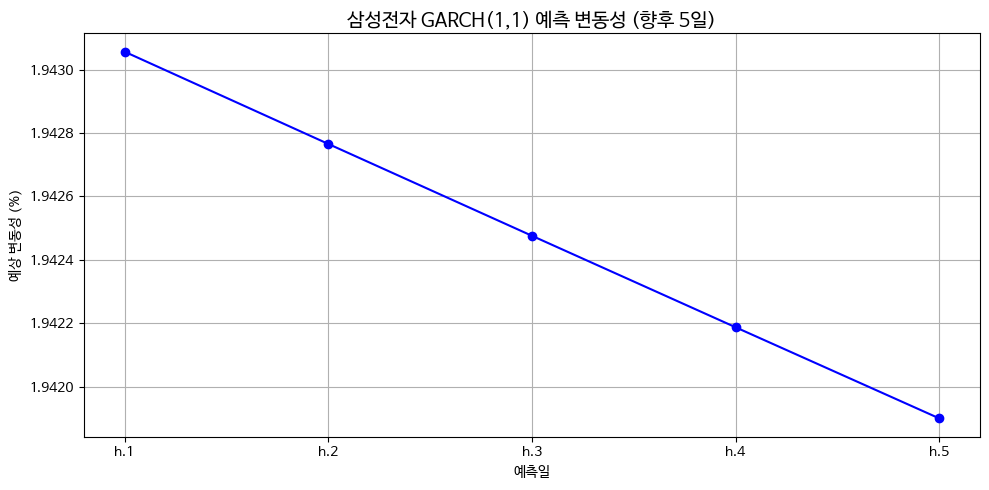

In [12]:
from pykrx import stock
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# 1. ÏÇºÏÑ±Ï†ÑÏûê(005930) Ï£ºÍ∞Ä Î∂àÎü¨Ïò§Í∏∞
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 3. GARCH(1,1) Î™®Îç∏ Ï†ÅÌï©
model = arch_model(df['log_return'] * 100, vol='GARCH', p=1, q=1)
result = model.fit(disp='off')

# 4. Ìñ•ÌõÑ 5ÏùºÍ∞Ñ Î≥ÄÎèôÏÑ± ÏòàÏ∏°
forecast = result.forecast(horizon=5)
predicted_vol = forecast.variance.iloc[-1] ** 0.5

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(predicted_vol.index, predicted_vol.values, marker='o', linestyle='-', color='blue')
plt.title("ÏÇºÏÑ±Ï†ÑÏûê GARCH(1,1) ÏòàÏ∏° Î≥ÄÎèôÏÑ± (Ìñ•ÌõÑ 5Ïùº)", fontsize=14)
plt.xlabel("ÏòàÏ∏°Ïùº")
plt.ylabel("ÏòàÏÉÅ Î≥ÄÎèôÏÑ± (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Ìï≠Î™©	Í≥ÑÏàò	Ìï¥ÏÑù
# mu	-0.0240	ÌèâÍ∑† ÏàòÏùµÎ•† (Îã®ÏúÑ: %) ‚Äî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå (p=0.663)
# omega	0.0076	Í∏∞Ï¥à Î∂ÑÏÇ∞(Ïû•Í∏∞ ÌèâÍ∑† ÏàòÏ§Ä), Ï¥àÍ∏∞ Î≥ÄÎèôÏÑ± ÏàòÏ§Ä
# alpha[1]	0.0449	Ïò§Ï∞®Ìï≠(ÏáºÌÅ¨)Ïùò ÏòÅÌñ• Í≥ÑÏàò ‚Äî ÏµúÍ∑º Îâ¥Ïä§Ïùò ÏòÅÌñ•Î†•
# beta[1]	0.9956	Ïù¥Ï†Ñ ÏãúÏ†êÏùò Î≥ÄÎèôÏÑ±(ÏûêÍ∏∞ÌöåÍ∑Ä) ÏòÅÌñ• Í≥ÑÏàò ‚Äî Î≥ÄÎèôÏÑ± ÏßÄÏÜçÏÑ±

## ÏÇºÏÑ±Ï†ÑÏûê GARCH(1,1) ÏòàÏ∏° Î≥ÄÎèôÏÑ± (Ìñ•ÌõÑ 30Ïùº)

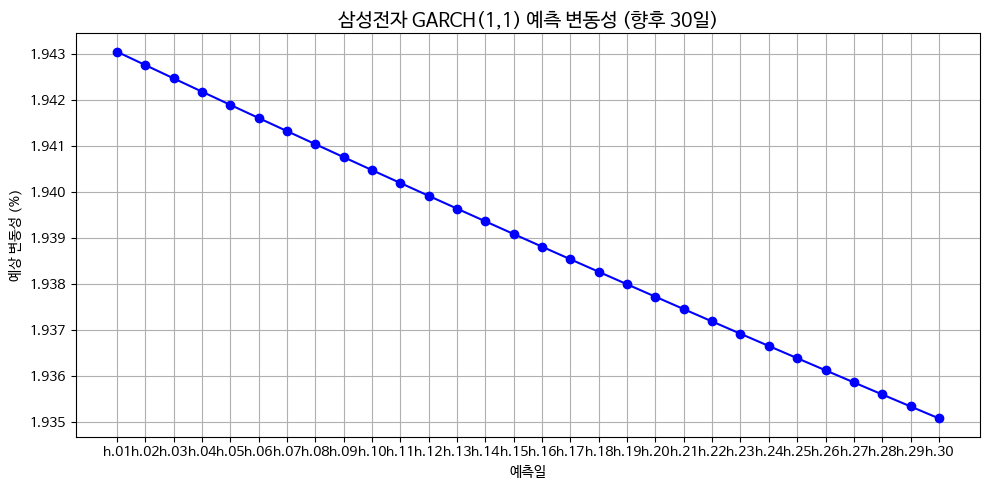

In [13]:
from pykrx import stock
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# 1. ÏÇºÏÑ±Ï†ÑÏûê(005930) Ï£ºÍ∞Ä Î∂àÎü¨Ïò§Í∏∞
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 3. GARCH(1,1) Î™®Îç∏ Ï†ÅÌï©
model = arch_model(df['log_return'] * 100, vol='GARCH', p=1, q=1)
result = model.fit(disp='off')

# 4. Ìñ•ÌõÑ 5ÏùºÍ∞Ñ Î≥ÄÎèôÏÑ± ÏòàÏ∏°
forecast = result.forecast(horizon=30)
predicted_vol = forecast.variance.iloc[-1] ** 0.5

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(predicted_vol.index, predicted_vol.values, marker='o', linestyle='-', color='blue')
plt.title("ÏÇºÏÑ±Ï†ÑÏûê GARCH(1,1) ÏòàÏ∏° Î≥ÄÎèôÏÑ± (Ìñ•ÌõÑ 30Ïùº)", fontsize=14)
plt.xlabel("ÏòàÏ∏°Ïùº")
plt.ylabel("ÏòàÏÉÅ Î≥ÄÎèôÏÑ± (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1610.93
Distribution:                  Normal   AIC:                           3229.86
Method:            Maximum Likelihood   BIC:                           3248.83
                                        No. Observations:                  848
Date:                Wed, Jun 25 2025   Df Residuals:                      847
Time:                        13:55:19   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0240  5.507e-02     -0.436      0.663 [ -0.132,

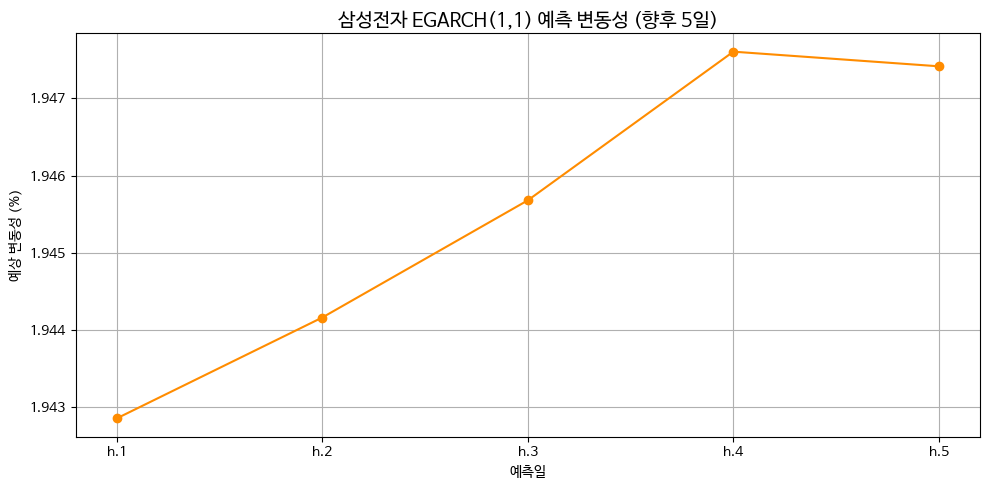

In [23]:
from pykrx import stock
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# 1. ÏÇºÏÑ±Ï†ÑÏûê(005930) Ï£ºÍ∞Ä Î∂àÎü¨Ïò§Í∏∞
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 3. EGARCH(1,1) Î™®Îç∏ Ï†ÅÌï©
model = arch_model(df['log_return'] * 100, vol='EGARCH', p=1, q=1)
result = model.fit(disp='off')

# ‚úÖ 3-1. Î™®Îç∏ ÏöîÏïΩ Ï∂úÎ†•
print(result.summary())

# 4. Ìñ•ÌõÑ 5ÏùºÍ∞Ñ Î≥ÄÎèôÏÑ± ÏòàÏ∏° (EGARCHÎäî simulation Î∞©Ïãù ÌïÑÏöî)
forecast = result.forecast(horizon=5, method='simulation')
predicted_vol = forecast.variance.iloc[-1] ** 0.5  # ÌëúÏ§ÄÌé∏Ï∞®

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(predicted_vol.index, predicted_vol.values, marker='o', linestyle='-', color='darkorange')
plt.title("ÏÇºÏÑ±Ï†ÑÏûê EGARCH(1,1) ÏòàÏ∏° Î≥ÄÎèôÏÑ± (Ìñ•ÌõÑ 5Ïùº)", fontsize=14)
plt.xlabel("ÏòàÏ∏°Ïùº")
plt.ylabel("ÏòàÏÉÅ Î≥ÄÎèôÏÑ± (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# omega: Í∏∞Î≥∏ ÏàòÏ§ÄÏùò Î°úÍ∑∏ Î∂ÑÏÇ∞
# EGARCHÎäî Î∂ÑÏÇ∞ ÎåÄÏã† **log(Î∂ÑÏÇ∞)**ÏùÑ ÏòàÏ∏° ‚Üí Ïù¥ Í≥ÑÏàòÎäî Î≥ÄÎèôÏÑ±Ïùò Í∏∞Ï§ÄÏÑ†
# p=0.073 ‚Üí Ïú†ÏùòÏÑ±ÏùÄ ÎÇÆÏßÄÎßå ÏïΩÌïú Í∏∞Ï†Ä Î≥ÄÎèôÏÑ± Ï°¥Ïû¨ Í∞ÄÎä•
# alpha[1]: Îâ¥Ïä§Ïùò Ï¶âÏãú Ìö®Í≥º
# Ï†ÑÏùº ÏàòÏùµÎ•† Ïò§Ï∞®Í∞Ä ÌÅ¥ÏàòÎ°ù Îã§Ïùå ÎÇ† Î≥ÄÎèôÏÑ±Ïóê ÏòÅÌñ•ÏùÑ Ï§å
# p=0.035 ‚Üí ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†Ïùò, ÏãúÏû•ÏùÄ Îâ¥Ïä§Ïóê Ï¶âÍ∞Å Î∞òÏùë
# beta[1]: Î≥ÄÎèôÏÑ±Ïùò ÏßÄÏÜçÏÑ± (Persistence)
# Ï†ÑÏùº Î≥ÄÎèôÏÑ±Ïù¥ Ïò§ÎäòÏùò Î≥ÄÎèôÏÑ±Ïóê ÏñºÎßàÎÇò ÏòÅÌñ•ÏùÑ Ï£ºÎäîÍ∞Ä
# 0.9956 ‚Üí Í±∞Ïùò 1Ïóê Í∞ÄÍπåÏö¥ ÏàòÏ§Ä ‚Üí Î≥ÄÎèôÏÑ±ÏùÄ Îß§Ïö∞ Ïò§Îûò ÏßÄÏÜç
# p ‚âà 0 ‚Üí Îß§Ïö∞ Ïú†Ïùò

In [ ]:
# ÏΩîÎìú ÏÑ§Î™Ö
# Îç∞Ïù¥ÌÑ∞ ÏãúÎÆ¨Î†àÏù¥ÏÖò

# ÎûúÎç§Ìïú ÏàòÏùµÎ•† Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≥†, ÌäπÏ†ï Íµ¨Í∞ÑÏóê Î≥ÄÎèôÏÑ± ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ Ï∂îÍ∞Ä.
# EGARCH(1,1) Î™®Îç∏ Ï†ÅÌï©

# arch ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©Ìï¥ EGARCH Î™®Îç∏ÏùÑ Ï†ÅÌï©.
# Í≤∞Í≥º ÏöîÏïΩ

# Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ÏôÄ ÌÜµÍ≥ÑÎüâÏùÑ ÏöîÏïΩ.
# Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ± ÏãúÍ∞ÅÌôî

# EGARCH Î™®Îç∏Î°ú Ï∂îÏ†ïÌïú ÏãúÏ†êÎ≥Ñ Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ±ÏùÑ ÌîåÎ°Ø.

## ÏÇºÏÑ±Ï†ÑÏûê ÏòàÏ∏° Î≥ÄÎèôÏÑ± (EGARCH(1,1), Ìñ•ÌõÑ 5Ïùº

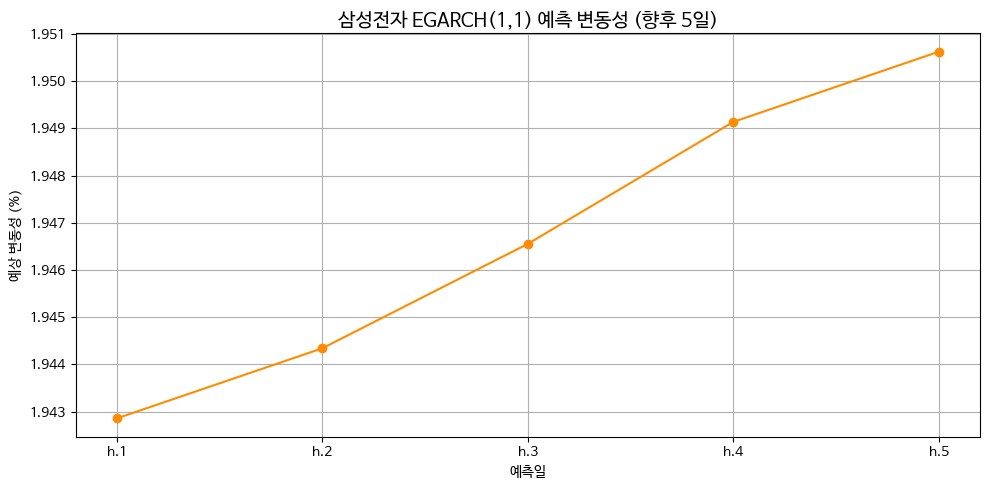

In [21]:
from pykrx import stock
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# 1. ÏÇºÏÑ±Ï†ÑÏûê(005930) Ï£ºÍ∞Ä Î∂àÎü¨Ïò§Í∏∞
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 3. EGARCH(1,1) Î™®Îç∏ Ï†ÅÌï©
model = arch_model(df['log_return'] * 100, vol='EGARCH', p=1, q=1)
result = model.fit(disp='off')

# 4. Ìñ•ÌõÑ 5ÏùºÍ∞Ñ Î≥ÄÎèôÏÑ± ÏòàÏ∏° (EGARCHÎäî simulation Î∞©Ïãù ÌïÑÏöî)
forecast = result.forecast(horizon=5, method='simulation')
predicted_vol = forecast.variance.iloc[-1] ** 0.5  # ÌëúÏ§ÄÌé∏Ï∞®

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(predicted_vol.index, predicted_vol.values, marker='o', linestyle='-', color='darkorange')
plt.title("ÏÇºÏÑ±Ï†ÑÏûê EGARCH(1,1) ÏòàÏ∏° Î≥ÄÎèôÏÑ± (Ìñ•ÌõÑ 5Ïùº)", fontsize=14)
plt.xlabel("ÏòàÏ∏°Ïùº")
plt.ylabel("ÏòàÏÉÅ Î≥ÄÎèôÏÑ± (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
from pykrx import stock
import pandas as pd
import numpy as np
from arch import arch_model

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Î∂àÎü¨Ïò§Í∏∞
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 3. EGARCH Î™®Îç∏ Ï†ÅÌï©
model = arch_model(df['log_return'] * 100, vol='EGARCH', p=1, q=1)
result = model.fit(disp='off')

# 4. 5Ïùº ÏòàÏ∏° (simulation Î∞©Ïãù)
forecast = result.forecast(horizon=5, method='simulation')
predicted_vol = forecast.variance.iloc[-1] ** 0.5  # ÌëúÏ§ÄÌé∏Ï∞®(ÏòàÏÉÅ Î≥ÄÎèôÏÑ±)

# 5. Í≤∞Í≥ºÌëú Ï∂úÎ†•
predicted_vol_df = predicted_vol.reset_index()
predicted_vol_df.columns = ['Date', 'Predicted Volatility (%)']
predicted_vol_df = predicted_vol_df.round(4)

print("\nüìä EGARCH Í∏∞Î∞ò Ìñ•ÌõÑ 5Ïùº ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Î≥ÄÎèôÏÑ± ÏòàÏ∏° Í≤∞Í≥º:")
print(predicted_vol_df)



üìä EGARCH Í∏∞Î∞ò Ìñ•ÌõÑ 5Ïùº ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Î≥ÄÎèôÏÑ± ÏòàÏ∏° Í≤∞Í≥º:
  Date  Predicted Volatility (%)
0  h.1                    1.9429
1  h.2                    1.9458
2  h.3                    1.9473
3  h.4                    1.9488
4  h.5                    1.9502


## ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Í∏∞Î∞ò ARCH vs GARCH ÎπÑÍµê ÏΩîÎìú

In [ ]:
# # 3. GARCH(1,1) Î™®Îç∏ Ï†ÅÌï©
# garch_model_instance = arch_model(df["log_return"] * 100, vol="GARCH", p=1, q=1)
# garch_results = garch_model_instance.fit(disp="off")

# vol="GARCH"	Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞ Î™®Îç∏Î°ú GARCHÎ•º ÏßÄÏ†ï (Í∏∞Î≥∏ GARCH Î™®Ìòï ÏÇ¨Ïö©)
# p=1:Í≥ºÍ±∞ Ïò§Ï∞® Ï†úÍ≥±Ìï≠  ARCH(1) Íµ¨ÏÑ±
# q=1 :	Í≥ºÍ±∞ Î∂ÑÏÇ∞Ìï≠ GARCH(1) Íµ¨ÏÑ±

# .fit()	ÏßÄÏ†ïÎêú GARCH Î™®Îç∏ÏùÑ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©(ÌïôÏäµ)ÏãúÌÇ¥
# disp="off"	ÌïôÏäµ Ï§ë Ï§ëÍ∞Ñ Î°úÍ∑∏ Ï∂úÎ†• ÏÉùÎûµ
# ‚Äì Í≤∞Í≥ºÎßå Î∞òÌôòÌïòÍ≥†, ÌïôÏäµ Í≥ºÏ†ïÏùÄ ÏΩòÏÜîÏóê Î≥¥Ïù¥ÏßÄ ÏïäÏùå

üìà ARCH(1) Model Results:

                      Constant Mean - ARCH Model Results                      
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1625.18
Distribution:                  Normal   AIC:                           3256.35
Method:            Maximum Likelihood   BIC:                           3270.58
                                        No. Observations:                  848
Date:                Wed, Jun 25 2025   Df Residuals:                      847
Time:                        15:34:39   Df Model:                            1
                                Mean Model                               
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -1.9642e-03  5.664e-02 -3.4

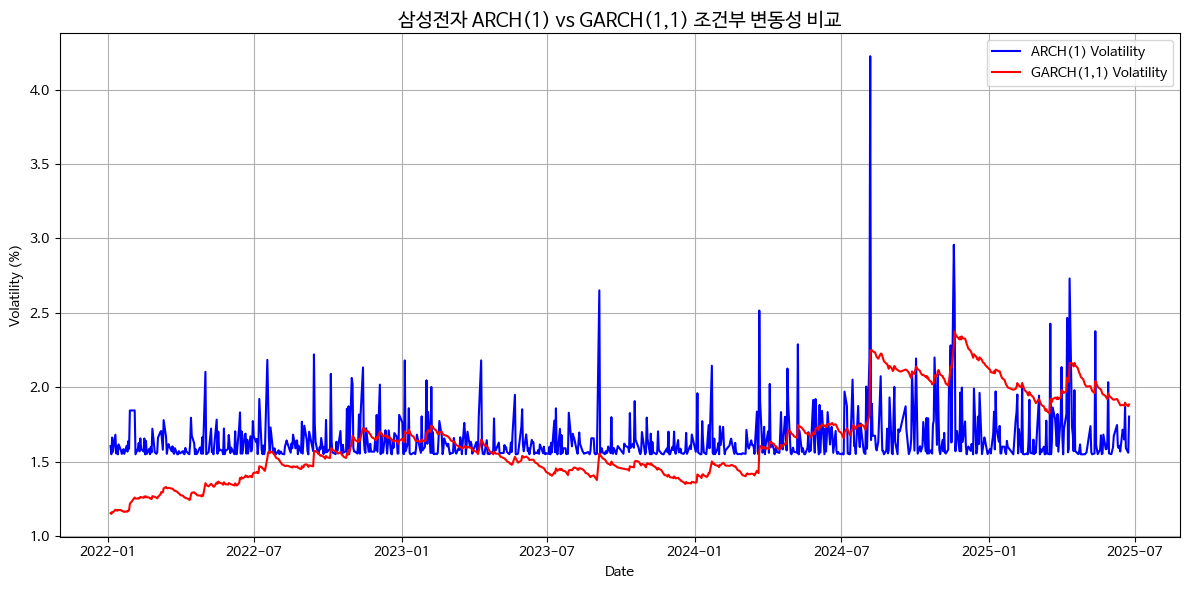

In [34]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Î∂àÎü¨Ïò§Í∏∞
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# Ïª¨Îüº Ï†ïÎ¶¨ Î∞è Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df = df[['Ï¢ÖÍ∞Ä']].copy()
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 2. ARCH(1) Î™®Îç∏ Ï†ÅÌï©
arch_model_instance = arch_model(df["log_return"] * 100, vol="ARCH", p=1)
arch_results = arch_model_instance.fit(disp="off")
print("üìà ARCH(1) Model Results:\n")
print(arch_results.summary())

# 3. GARCH(1,1) Î™®Îç∏ Ï†ÅÌï©
garch_model_instance = arch_model(df["log_return"] * 100, vol="GARCH", p=1, q=1)
garch_results = garch_model_instance.fit(disp="off")
print("\nüìä GARCH(1,1) Model Results:\n")
print(garch_results.summary())

# 4. Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ± ÏãúÍ∞ÅÌôî (ARCH vs GARCH)
plt.figure(figsize=(12, 6))
plt.plot(df.index, arch_results.conditional_volatility, label="ARCH(1) Volatility", color="blue")
plt.plot(df.index, garch_results.conditional_volatility, label="GARCH(1,1) Volatility", color="red")
plt.title("ÏÇºÏÑ±Ï†ÑÏûê ARCH(1) vs GARCH(1,1) Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ± ÎπÑÍµê", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Í≤∞Í≥º Ìï¥ÏÑù Ìè¨Ïù∏Ìä∏
# ARCH(1): Ï¶âÏãú Î∞òÏùëÌïòÏßÄÎßå Î∞òÏùëÏù¥ Îπ†Î•¥Í≤å ÏÇ¨ÎùºÏßê (ÏßßÏùÄ Í∏∞Ïñµ)

# GARCH(1,1): Ïû•Í∏∞Ï†ÅÏù∏ Î≥ÄÎèôÏÑ± Î∞òÏòÅÏóê Ïú†Î¶¨ÌïòÎ©∞, Îçî Î∂ÄÎìúÎü¨Ïö¥ Í≥°ÏÑ†

# ÎπÑÍµê Ïãú GARCHÍ∞Ä Îçî ÌòÑÏã§Ï†ÅÏù∏ Í∏àÏúµ ÏãúÍ≥ÑÏó¥ ÌäπÏÑ±ÏùÑ Ïûò ÏÑ§Î™ÖÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏäµÎãàÎã§

## EGARCH + t-Î∂ÑÌè¨ GARCH ÎπÑÍµê : t-GARCH

In [ ]:
# # 3-2. t-Î∂ÑÌè¨ GARCH(1,1) Î™®Îç∏ Ï†ÅÌï© : ÏΩîÎìúÏÑ§Î™Ö
# tgarch_model = arch_model(returns, vol='GARCH', p=1, q=1, dist='t')

# returns	: ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ (Î°úÍ∑∏ ÏàòÏùµÎ•† Îì±). Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞Ïùò ÎåÄÏÉÅ
# vol='GARCH': GARCH Í≥ÑÏó¥ Î™®Ìòï ÏßÄÏ†ï (Í∏∞Î≥∏ GARCH).
# p=1 : ARCH(Í≥ºÍ±∞ Ï∂©Í≤©) Ï∞®Ïàò,
# q=1 : GARCH(Í≥ºÍ±∞ Î∂ÑÏÇ∞) Ï∞®Ïàò
# dist='t'	: ÏûîÏ∞®Ìï≠Ïù¥ t-Î∂ÑÌè¨(t-distribution)Î•º Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ï
# ‚Üí Ï†ïÍ∑úÎ∂ÑÌè¨Î≥¥Îã§ Íº¨Î¶¨Í∞Ä ÎëêÍ∫ºÏõå Í∑πÎã®Í∞í(Ïù¥ÏÉÅÏπò)Ïóê Îçî ÎØºÍ∞ê

# tgarch_result = tgarch_model.fit(disp='off')

# disp='off' : ÌïôÏäµ Ï§ë Î°úÍ∑∏/ÏßÑÌñâ Î©îÏãúÏßÄÎ•º Ï∂úÎ†•ÌïòÏßÄ ÏïäÏùå (Ï°∞Ïö©Ìûà Ïã§Ìñâ)
# Î∞òÌôòÍ∞í (tgarch_result) :	ÌïôÏäµ Í≤∞Í≥º Í∞ùÏ≤¥ ‚Äî Ï∂îÏ†ï Í≥ÑÏàò, ÏûîÏ∞®, Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞ Îì±ÏùÑ Ìè¨Ìï®

üìò EGARCH(1,1) Î™®Îç∏ Í≤∞Í≥º:
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1610.93
Distribution:                  Normal   AIC:                           3229.86
Method:            Maximum Likelihood   BIC:                           3248.83
                                        No. Observations:                  848
Date:                Wed, Jun 25 2025   Df Residuals:                      847
Time:                        15:36:40   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0240  5.507e-02

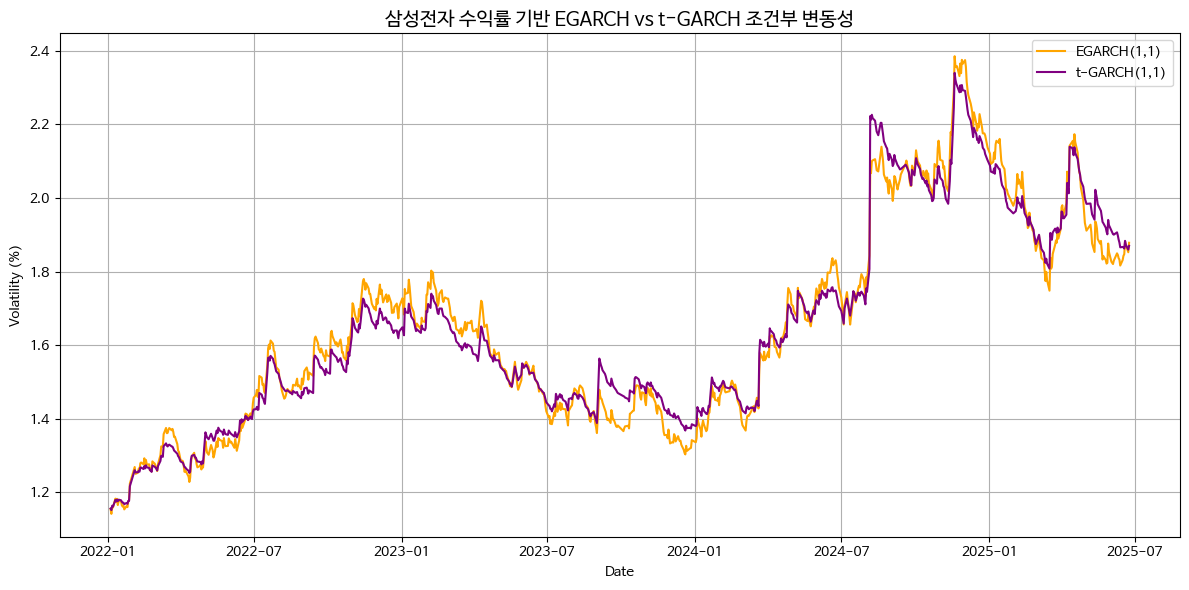

In [35]:
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
start_date = "2022-01-01"
end_date = "2025-06-24"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df = df[['Ï¢ÖÍ∞Ä']].copy()

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# ÏàòÏùµÎ•† Î∞±Î∂ÑÏú® Î≥ÄÌôò
returns = df['log_return'] * 100

# 3-1. EGARCH(1,1) Î™®Îç∏ Ï†ÅÌï©
egarch_model = arch_model(returns, vol='EGARCH', p=1, q=1)
egarch_result = egarch_model.fit(disp='off')

# 3-2. t-Î∂ÑÌè¨ GARCH(1,1) Î™®Îç∏ Ï†ÅÌï©
tgarch_model = arch_model(returns, vol='GARCH', p=1, q=1, dist='t')
tgarch_result = tgarch_model.fit(disp='off')

# 4. Í≤∞Í≥º Ï∂úÎ†•
print("üìò EGARCH(1,1) Î™®Îç∏ Í≤∞Í≥º:")
print(egarch_result.summary())

print("\nüìó t-Î∂ÑÌè¨ Í∏∞Î∞ò GARCH(1,1) Î™®Îç∏ Í≤∞Í≥º:")
print(tgarch_result.summary())

# 5. Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ± ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(egarch_result.conditional_volatility, label='EGARCH(1,1)', color='orange')
plt.plot(tgarch_result.conditional_volatility, label='t-GARCH(1,1)', color='purple')
plt.title("ÏÇºÏÑ±Ï†ÑÏûê ÏàòÏùµÎ•† Í∏∞Î∞ò EGARCH vs t-GARCH Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ±", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Ï†ïÍ∑úÎ∂ÑÌè¨ vs t-Î∂ÑÌè¨ GARCH Î™®Îç∏ ÎπÑÍµê

In [39]:
import pandas as pd

# ÏòàÏãú ÏàòÏπò Í∏∞Î∞ò ÎπÑÍµêÌëú
comparison_table = pd.DataFrame({
    "Î™®Îç∏": ["GARCH(1,1) - Normal", "GARCH(1,1) - Student's t"],
    "AIC (Akaike)": [3299.86, 3191.62],
    "BIC (Bayesian)": [3248.83, 3215.33],
    "Log-Likelihood": [-1610.93, -1590.81],
    "ÏûêÏú†ÎèÑ(df)": ["-", "5.82"]
})

# Ìëú Ï∂úÎ†•
print("\nüìä Ï†ïÍ∑úÎ∂ÑÌè¨ vs t-Î∂ÑÌè¨ GARCH Î™®Îç∏ ÎπÑÍµê")
print(comparison_table.to_string(index=False))



üìä Ï†ïÍ∑úÎ∂ÑÌè¨ vs t-Î∂ÑÌè¨ GARCH Î™®Îç∏ ÎπÑÍµê
                      Î™®Îç∏  AIC (Akaike)  BIC (Bayesian)  Log-Likelihood ÏûêÏú†ÎèÑ(df)
     GARCH(1,1) - Normal       3299.86         3248.83        -1610.93       -
GARCH(1,1) - Student's t       3191.62         3215.33        -1590.81    5.82


In [ ]:
# Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò GARCH Î™®Îç∏Í≥º t-Î∂ÑÌè¨ Í∏∞Î∞ò GARCH Î™®Îç∏Ïùò ÏÑ±Îä• ÏßÄÌëúÎ•º ÎπÑÍµêÌïú Í≤ÉÏûÖÎãàÎã§. 
# AIC, BIC, Log-LikelihoodÎ•º ÌÜµÌï¥ t-Î∂ÑÌè¨ Î™®Îç∏Ïù¥ Îçî ÎÇòÏùÄ Ï†ÅÌï©ÎèÑÎ•º Î≥¥ÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. 

## ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïóê TGARCH(1,1) Î™®Ìòï

In [2]:
from pykrx import stock
import pandas as pd
import datetime

# ÎÇ†Ïßú ÏÑ§Ï†ï
start_date = "2023-01-01"
end_date = "2025-06-25"
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d").strftime("%Y%m%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d").strftime("%Y%m%d")

# ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
samsung_df = stock.get_market_ohlcv_by_date(start_dt, end_dt, "005930")

# Ïù∏Îç±Ïä§Î•º Ïª¨ÎüºÏúºÎ°ú Î≥ÄÌôò
samsung_df.reset_index(inplace=True)

# Í≤∞Í≥º Ï∂úÎ†•
print(samsung_df.head())  # ÌòπÏùÄ samsung_df.to_csv("samsung_price.csv")Î°ú Ï†ÄÏû• Í∞ÄÎä•


          ÎÇ†Ïßú     ÏãúÍ∞Ä     Í≥†Í∞Ä     Ï†ÄÍ∞Ä     Ï¢ÖÍ∞Ä       Í±∞ÎûòÎüâ       Îì±ÎùΩÎ•†
0 2023-01-02  55500  56100  55200  55500  10031448  0.361664
1 2023-01-03  55400  56000  54500  55400  13547030 -0.180180
2 2023-01-04  55700  58000  55600  57800  20188071  4.332130
3 2023-01-05  58200  58800  57600  58200  15682826  0.692042
4 2023-01-06  58300  59400  57900  59000  17334989  1.374570


In [ ]:
# 4. TGARCH(GJR-GARCH) Î™®Ìòï Ï†ÅÌï© : ÏΩîÎìú ÏÑ§Î™Ö

# df['log_return']	Ï¢ÖÏÜç Î≥ÄÏàò: Î°úÍ∑∏ ÏàòÏùµÎ•† Î≤°ÌÑ∞ (Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞ÏùÑ Î™®Îç∏ÎßÅÌï† ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞)
# vol='GARCH'	GARCH Í≥ÑÏó¥ Î™®Ìòï ÏÇ¨Ïö© ÏßÄÏ†ï. ARCH, EGARCH Îì±ÎèÑ Í∞ÄÎä•
# p=1	ARCH Í≥ÑÏàòÏùò Ï∞®Ïàò: Í≥ºÍ±∞ Ïò§Ï∞® Ï†úÍ≥± Ìï≠Ïùò Í∞úÏàò (Œ± Í≥ÑÏàò)
# q=1	GARCH Í≥ÑÏàòÏùò Ï∞®Ïàò: Í≥ºÍ±∞ Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞ Ìï≠Ïùò Í∞úÏàò (Œ≤ Í≥ÑÏàò)
# o=1	TGARCH ÏÇ¨Ïö© Ïãú ÌïÑÏàò ÏòµÏÖò: ÎπÑÎåÄÏπ≠ÏÑ±(Î†àÎ≤ÑÎ¶¨ÏßÄ Ìö®Í≥º)ÏùÑ Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌïú Œ≥ Í≥ÑÏàòÏùò Ï∞®Ïàò
# dist='normal'	Ïò§Ï∞®Ìï≠Ïùò Î∂ÑÌè¨: Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ï. ÎåÄÏïàÏúºÎ°ú t, skewt Îì± Í∞ÄÎä•

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1168.016149784956
            Iterations: 9
            Function evaluations: 64
            Gradient evaluations: 9
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1168.02
Distribution:                  Normal   AIC:                           2346.03
Method:            Maximum Likelihood   BIC:                           2368.04
                                        No. Observations:                  603
Date:                Wed, Jun 25 2025   Df Residuals:                      602
Time:                        22:05:18   Df Model:                            1
                               Mean Model                               
         

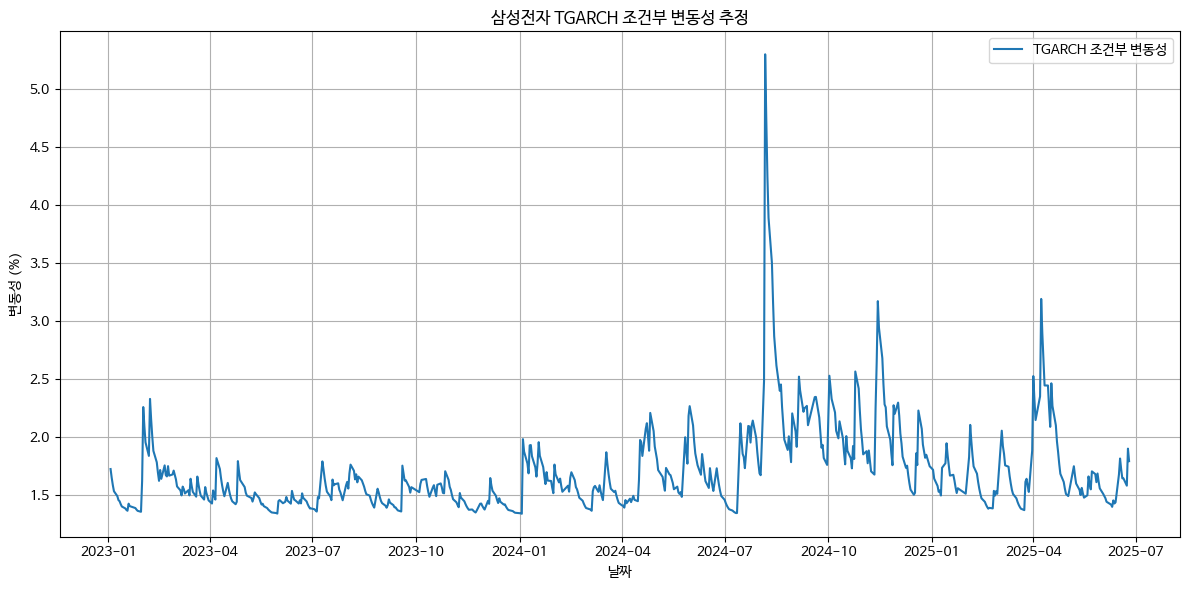

In [4]:
from pykrx import stock
import pandas as pd
import numpy as np
import datetime
from arch import arch_model
import matplotlib.pyplot as plt

# 1. ÎÇ†Ïßú ÏÑ§Ï†ï
start_date = "2023-01-01"
end_date = "2025-06-25"
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d").strftime("%Y%m%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d").strftime("%Y%m%d")

# 2. ÏÇºÏÑ±Ï†ÑÏûê ÏùºÎ≥Ñ OHLCV Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
df = stock.get_market_ohlcv_by_date(start_dt, end_dt, "005930")
df.reset_index(inplace=True)

# 3. ÏàòÏùµÎ•† Í≥ÑÏÇ∞ (Î°úÍ∑∏ ÏàòÏùµÎ•†)
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1)) * 100
df.dropna(inplace=True)

# 4. TGARCH(GJR-GARCH) Î™®Ìòï Ï†ÅÌï©
model = arch_model(df['log_return'], vol='GARCH', p=1, q=1, o=1, dist='normal')  # o=1 ‚Üí TGARCH (ÎπÑÎåÄÏπ≠ÏÑ±)
result = model.fit(update_freq=10)

# 5. Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•
print(result.summary())

# 6. Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞ ÏãúÍ∞ÅÌôî
df['fitted_volatility'] = result.conditional_volatility

plt.figure(figsize=(12,6))
plt.plot(df['ÎÇ†Ïßú'], df['fitted_volatility'], label='TGARCH Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ±')
plt.title('ÏÇºÏÑ±Ï†ÑÏûê TGARCH Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ± Ï∂îÏ†ï')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Î≥ÄÎèôÏÑ± (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
